<a href="https://colab.research.google.com/github/Adriano181/SQL-/blob/main/G54_ANALISIS_DE_DATOS_GRUPO1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Introdución </center>

In [ ]:
#aletnativa

##// from google.colab import drive
##// drive.mount('/content/drive')

# Se realiza la conexion de base de datos  desde  link de ubicacion de XLSX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url='https://drive.usercontent.google.com/download?id=1OM_7AZZajQwzqm97tFaFepxCLNiVgTfx&export=download&authuser=0&confirm=t&uuid=432970cb-82fc-4389-a17e-24d1efea1617&at=AN8xHop1nByqqwBRK7yvOqC-dj9A:1755043842291'

df=pd.read_excel(url)

print(df.head())

   CODIGO DEPARTAMENTO DEPARTAMENTO PROVINCIA  CÃ“DIGO MUNICIPIO  MUNICIPIO  \
0                   15      BOYACÃ   ORIENTE              15022    ALMEIDA   
1                   15      BOYACÃ  SUGAMUXI              15047  AQUITANIA   
2                   15      BOYACÃ  SUGAMUXI              15047  AQUITANIA   
3                   15      BOYACÃ  SUGAMUXI              15047  AQUITANIA   
4                   15      BOYACÃ  SUGAMUXI              15047  AQUITANIA   

   CODIGO DANE INSTITUCION EDUCATIVA       NOMBRE INSTITUCION EDUCATIVA  \
0                       315022000196                I.E. ENRIQUE SUAREZ   
1                       115047000019  I.E. TECNICA RAMON IGNACIO AVELLA   
2                       115047000019  I.E. TECNICA RAMON IGNACIO AVELLA   
3                       215047000099       I.E. REGION SUR DE AQUITANIA   
4                       115047000019  I.E. TECNICA RAMON IGNACIO AVELLA   

   CODIGO DANE SEDE NOMBRE SEDE EDUCATIVA   ZONA  \
0      215022000078   

Dentro del análisis de datos es importante realizar en primera instancia una limpieza de los datos contenidos en el Dataset a trabajar, debido a que esto permite al científico de datos eliminar errores, inconsistencias y valores atípicos que que podrían distorsionar los resultados del análisis y llevar a conclusiones incorrectas. Es por ello, que al garantizar que los datos sean precisos, completos y coherentes, se obtiene una base limpia para el análisis y se asegura que las conclusiones extraídas sean confiables y relevantes.  

Por consiguiente, la limpieza de los datos es esencial para la toma de decisiones informadas, debido a que los resultados del análisis exploratorio de datos se basa en datos precisos y confiables, sí por el contrario, se trabaja con los datos sucios o sin tratar, las decisiones tomadas a partir de ellos podrían ser incorrectas y tener consecuencias negativas.  

Para el caso del presente ejercicio, se escogió un dataset con la información de la conectividad del servicio de internet de las instituciones educativas oficiales del departamento de Boyacá, en donde se pretende analizar las diferentes variables tanto numéricas como categóricas, que permitirán conocer la situación actual de las instituciones y su porcentaje de cobertura, que es esencial para la población objetivo que son los niños, niñas, jóvenes y adolescentes como comunidad educativa.  

El análisis se verá reflejado a tráves de diferentes gráficos, que permiten la visualización de los datos de una manera más fácil y que así mismo, ayudan a una mejor comprensión de la información obtenida del dataset, con el fin de generar unas conclusiones y una discusión de los resultados obtenidos.

# Objetivos

* Realizar análisis de los datos, para reconocer los mismos e identificar las variables más relevantes númericas y categoricas.  
* Efectuar la limpieza de datos, para eliminar inconsistencias, errores, valores nulos o vacíos  
* Desarrollar las métricas descriptivas de las Variables numéricas y categóricas identificadas
* Presentar la matriz de correlación de las variables numéricas e identificar las variables que más se correlacionan  
* Elaborar los diagramas de barras, cajas, violín y pie que permitan visualizar la correlación de variables, distribuciones y comparación de las mismas, y utilizar la librería Folium para generar un mapa de georreferenciación de la ubicación en términos de latitud y longitud de las instituciones educativas estudiadas.

# <center>Exploración Inicial del Dataset y Limpieza de Datos</center>

In [ ]:
import pandas as pd

# The dataframe 'df' is already loaded from the URL in the previous cell,
# so there is no need to load it again from a local file.

# Verificar nombres de columnas
print("\n Nombre de Columnas del Dataset:\n")
print(df.columns.tolist())

print(" Dimensiones iniciales del Dataset:", df.shape)

# Se renombrarn las columnas para quitar tildes, espacios y caracteres especiales
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("Á", "A")
    .str.replace("É", "E")
    .str.replace("Í", "I")
    .str.replace("Ó", "O")
    .str.replace("Ú", "U")
    .str.replace("Ñ", "N")
    .str.replace("Ã“", "O")
    .str.replace("Ã‰", "E") # Added to handle the character observed in 'DEPARTAMENTO'
    .str.replace("Ã", "A") # Added to handle other potential similar characters
)


print("\n Columnas después de renombrar:\n")

print(df.columns.tolist())

# Se revisan valores nulos por columna

print("\n Valores nulos por columna:\n")
print(df.isnull().sum())

# Se eliminan las filas duplicadas

df = df.drop_duplicates()
print("\n Después de eliminar duplicados:", df.shape)

# Se rellenan valores nulos o que aparezcan "sin dato"

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna("Sin dato")

# En el caso que sean campos númericos se rellena con 0 sí figuran nulos o vacíos

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(0)

# Corregir coordenadas LATITUD y LONGITUD

df = df[(df['LATITUD'] > 0) & (df['LONGITUD'] < 0)]

# se muestra la información contenida en el dataframe como el número de registros, el número de columnas (dimensiones) y el tipo de datos de las columnas
print("\n Dimensiones finales del Dataset después de limpieza:\n")

df.info()




# Guardar copia archivo después de realizar la limpeza de datos
# This part is commented out as saving to a local file might not be desired
df.to_excel("instituciones_boyaca_limpio.xlsx", index=True)
 print("\n Archivo limpio guardado como: instituciones_boyaca_limpio.xlsx")


 Nombre de Columnas del Dataset:

['CODIGO DEPARTAMENTO', 'DEPARTAMENTO', 'PROVINCIA', 'CÃ“DIGO MUNICIPIO', 'MUNICIPIO', 'CODIGO DANE INSTITUCION EDUCATIVA', 'NOMBRE INSTITUCION EDUCATIVA', 'CODIGO DANE SEDE', 'NOMBRE SEDE EDUCATIVA', 'ZONA', 'PROYECTOS DE CONECTIVIDAD 2024', 'OPERADOR', 'ESTADO', 'MEDIO DE ENLACE', 'ANCHO DE BANDA DE SUBIDA (MB)', 'ANCHO DE BANDA DESCARGA (MB)', 'FINALIZACIÃ“N', 'LATITUD', 'LONGITUD']
 Dimensiones iniciales del Dataset: (2006, 19)

 Columnas después de renombrar:

['CODIGO_DEPARTAMENTO', 'DEPARTAMENTO', 'PROVINCIA', 'CODIGO_MUNICIPIO', 'MUNICIPIO', 'CODIGO_DANE_INSTITUCION_EDUCATIVA', 'NOMBRE_INSTITUCION_EDUCATIVA', 'CODIGO_DANE_SEDE', 'NOMBRE_SEDE_EDUCATIVA', 'ZONA', 'PROYECTOS_DE_CONECTIVIDAD_2024', 'OPERADOR', 'ESTADO', 'MEDIO_DE_ENLACE', 'ANCHO_DE_BANDA_DE_SUBIDA_(MB)', 'ANCHO_DE_BANDA_DESCARGA_(MB)', 'FINALIZACION', 'LATITUD', 'LONGITUD']

 Valores nulos por columna:

CODIGO_DEPARTAMENTO                     0
DEPARTAMENTO                        

In [ ]:
#Se muestran los encabezados del dataframe con las primeras filas
df.head()

CODIGO_DEPARTAMENTO DEPARTAMENTO PROVINCIA  CODIGO_MUNICIPIO  MUNICIPIO  \
0                   15      BOYACÃ   ORIENTE             15022    ALMEIDA   
1                   15      BOYACÃ  SUGAMUXI             15047  AQUITANIA   
2                   15      BOYACÃ  SUGAMUXI             15047  AQUITANIA   
3                   15      BOYACÃ  SUGAMUXI             15047  AQUITANIA   
4                   15      BOYACÃ  SUGAMUXI             15047  AQUITANIA   

   CODIGO_DANE_INSTITUCION_EDUCATIVA       NOMBRE_INSTITUCION_EDUCATIVA  \
0                       315022000196                I.E. ENRIQUE SUAREZ   
1                       115047000019  I.E. TECNICA RAMON IGNACIO AVELLA   
2                       115047000019  I.E. TECNICA RAMON IGNACIO AVELLA   
3                       215047000099       I.E. REGION SUR DE AQUITANIA   
4                       115047000019  I.E. TECNICA RAMON IGNACIO AVELLA   

   CODIGO_DANE_SEDE NOMBRE_SEDE_EDUCATIVA   ZONA  \
0      215022000078          ESC EL ROSAL  RURAL   
1      215047000196             ESC CAJON  RURAL   
2      215047000439             ESC DAITO  RURAL   
3      215047000579          ESC DIGANOME  RURAL   
4      215047000188          ESC EL TOBAL  RURAL   

  PROYECTOS_DE_CONECTIVIDAD_2024  \
0                 CENTRO DIGITAL   
1                 CENTRO DIGITAL   
2                 CENTRO DIGITAL   
3                 CENTRO DIGITAL   
4                 CENTRO DIGITAL   

                                       OPERADOR                      ESTADO  \
0  UNION TEMPORAL DE ETB NET COLOMBIA CONECTADA                EN OPERACION   
1  UNION TEMPORAL DE ETB NET COLOMBIA CONECTADA  PENDIENTE INICIO OPERACION   
2  UNION TEMPORAL DE ETB NET COLOMBIA CONECTADA                EN OPERACION   
3  UNION TEMPORAL DE ETB NET COLOMBIA CONECTADA  PENDIENTE INICIO OPERACION   
4  UNION TEMPORAL DE ETB NET COLOMBIA CONECTADA  PENDIENTE INICIO OPERACION   

  MEDIO_DE_ENLACE  ANCHO_DE_BANDA_DE_SUBIDA_(MB)  \
0        Sin dato                            3.0   
1        Sin dato                            3.0   
2        Sin dato                          375.0   
3        Sin dato                            3.0   
4        Sin dato                            3.0   

   ANCHO_DE_BANDA_DESCARGA_(MB) FINALIZACION       LATITUD      LONGITUD  
0                          12.0   2032-01-12  4.945062e+08 -7.338085e+09  
1                          12.0   2032-01-12  5.369444e+06 -7.288139e+07  
2                          15.0   2032-01-12  5.498778e+09 -7.291265e+09  
3                          12.0   2032-01-12  5.304167e+06 -7.292778e+07  
4                          12.0   2032-01-12  5.508333e+06 -7.286917e+07

In [ ]:
#Se muestran los encabezados del dataframe con las últimas filas
df.tail()

CODIGO_DEPARTAMENTO DEPARTAMENTO PROVINCIA  CODIGO_MUNICIPIO  MUNICIPIO  \
2001                   15      BOYACÃ   LENGUPA             15897  ZETAQUIRA   
2002                   15      BOYACÃ   LENGUPA             15897  ZETAQUIRA   
2003                   15      BOYACÃ   LENGUPA             15897  ZETAQUIRA   
2004                   15      BOYACÃ   LENGUPA             15897  ZETAQUIRA   
2005                   15      BOYACÃ  RICAURTE             15469  MONIQUIRA   

      CODIGO_DANE_INSTITUCION_EDUCATIVA   NOMBRE_INSTITUCION_EDUCATIVA  \
2001                       115897000018  I.E. LIBARDO CUERVO PATARROYO   
2002                       115897000018  I.E. LIBARDO CUERVO PATARROYO   
2003                       115897000018  I.E. LIBARDO CUERVO PATARROYO   
2004                       115897000018  I.E. LIBARDO CUERVO PATARROYO   
2005                       215469000342         I.E. SAN ALBERTO MAGNO   

      CODIGO_DANE_SEDE NOMBRE_SEDE_EDUCATIVA   ZONA  \
2001      215897000179       HORMIGAS RINCON  RURAL   
2002      215897000055        PATANOA CENTRO  RURAL   
2003      215897000063        PATANOA RINCON  RURAL   
2004      215897000250          SANTA HELENA  RURAL   
2005      215469000105   SEDE NEVAL Y CRUCES  RURAL   

     PROYECTOS_DE_CONECTIVIDAD_2024      OPERADOR        ESTADO  \
2001                   SIN PROYECTO  SIN OPERADOR  SIN SERVICIO   
2002                   SIN PROYECTO  SIN OPERADOR  SIN SERVICIO   
2003                   SIN PROYECTO  SIN OPERADOR  SIN SERVICIO   
2004                   SIN PROYECTO  SIN OPERADOR  SIN SERVICIO   
2005                   SIN PROYECTO  SIN OPERADOR  SIN SERVICIO   

     MEDIO_DE_ENLACE  ANCHO_DE_BANDA_DE_SUBIDA_(MB)  \
2001        Sin dato                            0.0   
2002        Sin dato                            0.0   
2003        Sin dato                            0.0   
2004        Sin dato                            0.0   
2005        Sin dato                            0.0   

      ANCHO_DE_BANDA_DESCARGA_(MB) FINALIZACION       LATITUD     LONGITUD  
2001                           0.0          NaT  5.241205e+09 -731508003.0  
2002                           0.0          NaT  5.283333e+06  -73156667.0  
2003                           0.0          NaT  5.299486e+09 -731561816.0  
2004                           0.0          NaT  5.283056e+06      -7317.0  
2005                           0.0          NaT  5.903176e+06  -73561679.0

In [ ]:
#se muestran los valores unicos contenidos en cada columna, es decir, cuenta el número de valores únicos en cada columna del DataFrame
df.nunique()

CODIGO_DEPARTAMENTO                     1
DEPARTAMENTO                            1
PROVINCIA                              13
CODIGO_MUNICIPIO                      123
MUNICIPIO                             124
CODIGO_DANE_INSTITUCION_EDUCATIVA     263
NOMBRE_INSTITUCION_EDUCATIVA          250
CODIGO_DANE_SEDE                     1920
NOMBRE_SEDE_EDUCATIVA                1698
ZONA                                    2
PROYECTOS_DE_CONECTIVIDAD_2024          4
OPERADOR                                4
ESTADO                                  4
MEDIO_DE_ENLACE                         4
ANCHO_DE_BANDA_DE_SUBIDA_(MB)           6
ANCHO_DE_BANDA_DESCARGA_(MB)            7
FINALIZACION                            2
LATITUD                              1807
LONGITUD                             1816
dtype: int64

In [ ]:
# Reemplazar todos los valores en la columna 'DEPARTAMENTO' por 'BOYACA', teniendo en cuenta que al cargar el dataset no se reconoce las tildes y presentaba un caracter en vez de la letra correspondiente
df['DEPARTAMENTO'] = 'BOYACA'

# Mostrar el resultado
df

CODIGO_DEPARTAMENTO DEPARTAMENTO PROVINCIA  CODIGO_MUNICIPIO  MUNICIPIO  \
0                      15       BOYACA   ORIENTE             15022    ALMEIDA   
1                      15       BOYACA  SUGAMUXI             15047  AQUITANIA   
2                      15       BOYACA  SUGAMUXI             15047  AQUITANIA   
3                      15       BOYACA  SUGAMUXI             15047  AQUITANIA   
4                      15       BOYACA  SUGAMUXI             15047  AQUITANIA   
...                   ...          ...       ...               ...        ...   
2001                   15       BOYACA   LENGUPA             15897  ZETAQUIRA   
2002                   15       BOYACA   LENGUPA             15897  ZETAQUIRA   
2003                   15       BOYACA   LENGUPA             15897  ZETAQUIRA   
2004                   15       BOYACA   LENGUPA             15897  ZETAQUIRA   
2005                   15       BOYACA  RICAURTE             15469  MONIQUIRA   

      CODIGO_DANE_INSTITUCION_EDUCATIVA       NOMBRE_INSTITUCION_EDUCATIVA  \
0                          315022000196                I.E. ENRIQUE SUAREZ   
1                          115047000019  I.E. TECNICA RAMON IGNACIO AVELLA   
2                          115047000019  I.E. TECNICA RAMON IGNACIO AVELLA   
3                          215047000099       I.E. REGION SUR DE AQUITANIA   
4                          115047000019  I.E. TECNICA RAMON IGNACIO AVELLA   
...                                 ...                                ...   
2001                       115897000018      I.E. LIBARDO CUERVO PATARROYO   
2002                       115897000018      I.E. LIBARDO CUERVO PATARROYO   
2003                       115897000018      I.E. LIBARDO CUERVO PATARROYO   
2004                       115897000018      I.E. LIBARDO CUERVO PATARROYO   
2005                       215469000342             I.E. SAN ALBERTO MAGNO   

      CODIGO_DANE_SEDE NOMBRE_SEDE_EDUCATIVA   ZONA  \
0         215022000078          ESC EL ROSAL  RURAL   
1         215047000196             ESC CAJON  RURAL   
2         215047000439             ESC DAITO  RURAL   
3         215047000579          ESC DIGANOME  RURAL   
4         215047000188          ESC EL TOBAL  RURAL   
...                ...                   ...    ...   
2001      215897000179       HORMIGAS RINCON  RURAL   
2002      215897000055        PATANOA CENTRO  RURAL   
2003      215897000063        PATANOA RINCON  RURAL   
2004      215897000250          SANTA HELENA  RURAL   
2005      215469000105   SEDE NEVAL Y CRUCES  RURAL   

     PROYECTOS_DE_CONECTIVIDAD_2024  \
0                    CENTRO DIGITAL   
1                    CENTRO DIGITAL   
2                    CENTRO DIGITAL   
3                    CENTRO DIGITAL   
4                    CENTRO DIGITAL   
...                             ...   
2001                   SIN PROYECTO   
2002                   SIN PROYECTO   
2003                   SIN PROYECTO   
2004                   SIN PROYECTO   
2005                   SIN PROYECTO   

                                          OPERADOR  \
0     UNION TEMPORAL DE ETB NET COLOMBIA CONECTADA   
1     UNION TEMPORAL DE ETB NET COLOMBIA CONECTADA   
2     UNION TEMPORAL DE ETB NET COLOMBIA CONECTADA   
3     UNION TEMPORAL DE ETB NET COLOMBIA CONECTADA   
4     UNION TEMPORAL DE ETB NET COLOMBIA CONECTADA   
...                                            ...   
2001                                  SIN OPERADOR   
2002                                  SIN OPERADOR   
2003                                  SIN OPERADOR   
2004                                  SIN OPERADOR   
2005                                  SIN OPERADOR   

                          ESTADO MEDIO_DE_ENLACE  \
0                   EN OPERACION        Sin dato   
1     PENDIENTE INICIO OPERACION        Sin dato   
2                   EN OPERACION        Sin dato   
3     PENDIENTE INICIO OPERACION        Sin dato   
4     PENDIENTE INICIO OPERACION        Sin dato   
...  

Realizando un análisis inicial al dataset de las instituciones educativas, se encuentra que esta compuesto por 19 columnas y 2006 registros dimensiones extraídas del archivo Excel cargado, al cual se le realiza el proceso de limpieza de datos, en el cual como primer paso una vez visualizado los campos del dataset, se renombran las columnas que tienen inconsistencia por tildes, espacios en el nombre y caracteres especiales como la letra “ñ” que phyton no la reconoce y cambia a un carácter ilegible.  

Terminado el renombramiento de columnas para darles formato, se procede a visualizaar los campos nuevamente con los cambios realizados y se continua con la identificación de los registros nulos o vacíos por columna del dataset, para ser eliminados o rellenados con cero (0) en el caso de campos numéricos y en el caso de los campos tipo texto aparezcan con “sin dato”, en caso que aplique, esta operación permite tener datos consistentes y reales para realizar más adelante operaciones estadísticas que generen un resultado más confiable.

Por otro lado, se corrigen las coordenadas de los campos denominados “LATITUD” y ”LONGITUD” con el fin de dar el formato correcto, para ser tomados más adelante para generar un mapa de georreferenciación de la cobertura de internet de las instituciones educativas.  

Continuando con la limpieza, se analiza si dentro del dataset se encuentran datos duplicados, que podrían ser causa de inconsistencia en resultados de relevancia, este tipo de datos duplicados se eliminan, teniendo en cuenta que no afecten la información que puede ser de importancia. Otra operación realizada, es la visualización de todos los campos con su tipo de documento que nos permite reconocer sí los campos son numéricos, texto, decimales o booleanos, dato de gran importancia para establecer las operaciones estadísticas a utilizar con cada uno de ellos y generar unos resultados acordes.
Otro paso, es conocer y visualizar las primeras y últimas filas del dataset, para corroborar que se este completa la información. Después de limpieza el dataset tiene nuevas dimensiones correspondientes a 1925 registros y 19 columnas.

Por último, se genera un archivo de copia .xlsx en donde se ven reflejados los cambios y con el cual se trabajarán las diferentes operaciones requeridas del análisis exploratorio, sin generar daños en el archivo original, que puede ser utilizado en caso de presentarse algún inconveniente. Es recomendable realizar esta operación para no perder información por accidente o alterarla, causando pérdida de valor también.


# <center>Análisis Exploratorio del Dataset</Center>

# Métricas Descriptivas para Variables Numéricas y Categóricas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The dataframe 'df' is already loaded and cleaned in the previous cells,
# so there is no need to load it again from a local file.

print(f" Dimensiones: {df.shape}")

# Definir variables numéricas y categóricas
#numericas
num_cols = [
    'CODIGO_MUNICIPIO',
    'CODIGO_DANE_INSTITUCION_EDUCATIVA',
    'CODIGO_DANE_SEDE',
    'ANCHO_DE_BANDA_DE_SUBIDA_(MB)',
    'ANCHO_DE_BANDA_DESCARGA_(MB)',
    'LATITUD',
    'LONGITUD'
]
#categoricas
cat_cols = [
    'DEPARTAMENTO', 'PROVINCIA', 'MUNICIPIO', 'NOMBRE_INSTITUCION_EDUCATIVA',
    'NOMBRE_SEDE_EDUCATIVA', 'ZONA', 'PROYECTOS_DE_CONECTIVIDAD_2024',
    'OPERADOR', 'ESTADO', 'MEDIO_DE_ENLACE'
]

# Filtrar las columnas del dataset
num_cols_validas = [col for col in num_cols if col in df.columns]
cat_cols_validas = [col for col in cat_cols if col in df.columns]

# Métricas descriptivas numéricas
desc_num = df[num_cols_validas].describe(percentiles=[.25, .5, .75]).T
desc_num = desc_num.rename(columns={
    '25%': 'percentil_25', '50%': 'percentil_50', '75%': 'percentil_75'
})
desc_num = desc_num[['count', 'mean', 'std', 'min',
                     'percentil_25', 'percentil_50', 'percentil_75', 'max']]

print("\n Métricas descriptivas – Variables Numéricas:")
print(desc_num)

 Dimensiones: (1925, 19)

 Métricas descriptivas – Variables Numéricas:
                                    count          mean           std  \
CODIGO_MUNICIPIO                   1925.0  1.548485e+04  2.452449e+02   
CODIGO_DANE_INSTITUCION_EDUCATIVA  1925.0  1.850927e+11  7.741628e+10   
CODIGO_DANE_SEDE                   1925.0  2.072750e+11  3.916358e+10   
ANCHO_DE_BANDA_DE_SUBIDA_(MB)      1925.0  2.763221e+01  9.515652e+01   
ANCHO_DE_BANDA_DESCARGA_(MB)       1925.0  7.841558e+00  7.445180e+00   
LATITUD                            1925.0  6.069245e+12  1.362731e+14   
LONGITUD                           1925.0 -7.772984e+12  1.683400e+14   

                                            min  percentil_25  percentil_50  \
CODIGO_MUNICIPIO                   1.500100e+04  1.524400e+04  1.551400e+04   
CODIGO_DANE_INSTITUCION_EDUCATIVA  1.150010e+11  1.155070e+11  2.151090e+11   
CODIGO_DANE_SEDE                   1.150220e+11  2.151830e+11  2.154800e+11   
ANCHO_DE_BANDA_DE_SUBIDA_(M

Las variables numéricas o cuantitativas identificadas del dataset son las que van a mostrar un comportamiento que es medible y del cual se convierten en indicadores estadísticos, que permiten obtener resultados relevantes, para este caso se escogieron las siguientes:  

•	CODIGO_MUNICIPIO  
•	CODIGO_DANE_INSTITUCION_EDUCATIVA  
•	CODIGO_DANE_SEDE  
•	ANCHO_DE_BANDA_DE_SUBIDA_(MB)  
•	ANCHO_DE_BANDA_DESCARGA_(MB)  
•	LATITUD  
•	LONGITUD  

De las anteriores variables, se trabajarán para el ejercicio ANCHO_DE_BANDA_DE_SUBIDA_(MB), ANCHO_DE_BANDA_DESCARGA_(MB), LATITUD y LONGITUD, que arrojan datos interesantes en cuanto a la calidad de la cobertura del servicio de internet y del operador y así mismo, a través de la latitud y longitud, se puede establecer y mostrar la ubicación mediante un mapa de georreferenciación de las instituciones educativas, para tener una mejor comprensión de su posición geográfica y su accesibilidad de territorio para llevar el servicio. También conocer cuáles y en qué municipio del departamento están ubicadas la mayor cantidad de instituciones con el servicio de internet operando y su ancho de banda es bueno, regular o malo.

In [ ]:
#  Métricas descriptivas categóricas

cat_cols = df.select_dtypes(include='object')

# Métricas descriptivas para cada variable categórica
print("\n Métricas descriptivas – Variables Categóricas:")
for col in cat_cols.columns:
    print(f"\nColumna: {col}")
    print(f"- Cantidad de datos: {cat_cols[col].count()}")
    print(f"- Valores únicos: {cat_cols[col].nunique()}")
    moda = cat_cols[col].mode()[0]
    freq = cat_cols[col].value_counts()[moda]
    print(f"- Moda: {moda}")
    print(f"- Frecuencia de la moda: {freq}")



 Métricas descriptivas – Variables Categóricas:

Columna: DEPARTAMENTO
- Cantidad de datos: 1925
- Valores únicos: 1
- Moda: BOYACA
- Frecuencia de la moda: 1925

Columna: PROVINCIA
- Cantidad de datos: 1925
- Valores únicos: 13
- Moda: OCCIDENTE
- Frecuencia de la moda: 393

Columna: MUNICIPIO
- Cantidad de datos: 1925
- Valores únicos: 124
- Moda: SABOYA
- Frecuencia de la moda: 48

Columna: NOMBRE_INSTITUCION_EDUCATIVA
- Cantidad de datos: 1925
- Valores únicos: 250
- Moda: I.E. JORGE ELIECER GAITAN
- Frecuencia de la moda: 30

Columna: NOMBRE_SEDE_EDUCATIVA
- Cantidad de datos: 1925
- Valores únicos: 1698
- Moda: ESC SAN ANTONIO
- Frecuencia de la moda: 14

Columna: ZONA
- Cantidad de datos: 1925
- Valores únicos: 2
- Moda: RURAL
- Frecuencia de la moda: 1675

Columna: PROYECTOS_DE_CONECTIVIDAD_2024
- Cantidad de datos: 1925
- Valores únicos: 4
- Moda: SIN PROYECTO
- Frecuencia de la moda: 853

Columna: OPERADOR
- Cantidad de datos: 1925
- Valores únicos: 4
- Moda: SIN OPERADOR
- 

Para este paso, se definen las variables categóricas o cualitativas del dataset que son características que no se pueden cuantificar, pero si se pueden analizar según su naturaleza, ya sean ordinales o nominales, para el caso del dataset de las instituciones educativas de Boyacá, se tomaron las siguientes variables categóricas que son de tipo ordinal por su relación u orden natural entre ellas:

•	DEPARTAMENTO  
•	PROVINCIA  
•	MUNICIPIO  
•	NOMBRE_INSTITUCION_EDUCATIVA  
•	NOMBRE_SEDE_EDUCATIVA  
•	ZONA  
•	PROYECTOS_DE_CONECTIVIDAD_2024  
•	OPERADOR  
•	ESTADO  
•	MEDIO_DE_ENLACE  

Estas variables nos permiten conocer el estado del proyecto de conectividad si está en operación, pendiente de operación o sin servicio de la red de cobertura de internet en las instituciones educativas oficiales del sector rural y urbano del departamento de Boyacá, son datos relevantes, debido a que se puede examinar que zonas tienen mejor cobertura con que operador están trabajando o sí por problemas de accesibilidad del terreno, no ha sido posible instalar el servicio para ser prestado correctamente a la comunidad educativa.

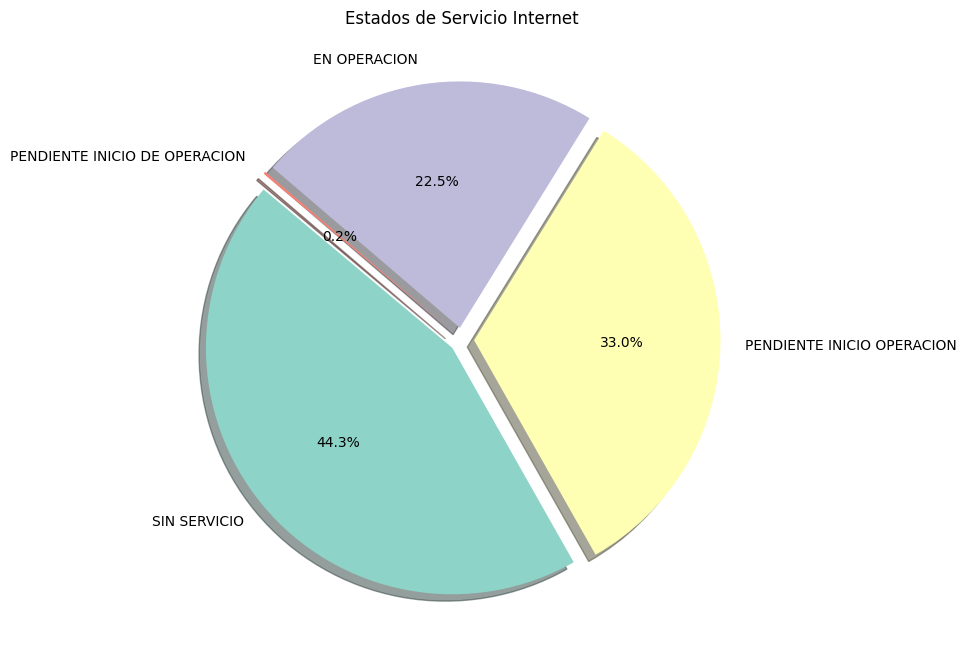

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos
counts = df['ESTADO'].value_counts()

# Colores opcionales
colors = plt.cm.Set3(range(len(counts)))

# Crear figura y eje
fig, ax = plt.subplots(figsize=(8,8))

# Diagrama de pie 3D
explode = [0.05] * len(counts)

wedges, texts, autotexts = ax.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    shadow=True
)

# Visualización de la gráfica
plt.title("Estados de Servicio Internet")
plt.show()


Analizando los resultados del diagrama de pie, en donde se tomó específicamente el campo “ESTADO”, se puede observar que el porcentaje de proyectos de conectividad con estado en “OPERACION”, es decir, instalados y con servicio activo de internet en al institución educativa es del 22.5% de un total de 1925 registros del dataset, lo que es visiblemente preocupante para el departamento, ya que es menos del 50% de las instituciones que no tienen cobertura de un servicio básico para ser utilizado en la educación de los niños, niñas y adolescentes.  

Un 33.0% aún son proyectos pendientes por iniciar operación, que puede deberse a problemas de contratación del recurso humano y la implementación del recurso tecnológico para llevar a cabo la ejecución con éxito y por último, se observa un 44.3% de instituciones educativas oficiales del departamento de Boyacá que ni siquiera tienen un proyecto de conectividad formulado, lo que permite concluir que el departamento aún esta atrasado en cuanto el despliegue de la cobertura tecnológica planteada inicialmente en el plan de desarrollo para el presente cuatrienio 2023-2027, que tiene como meta alcanzar el 70% de estudiantes con acceso a internet a través de proyectos de conectividad

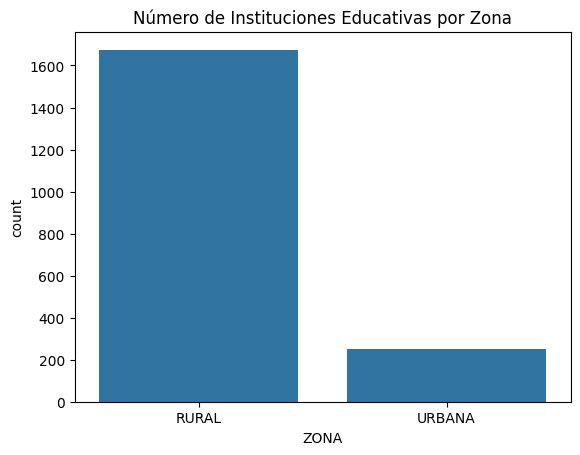

In [ ]:
# Diagrama de barras
sns.countplot(x='ZONA', data=df)
plt.title("Número de Instituciones Educativas por Zona")
plt.show()


Este diagrama de barras, muestra un comparativo entre las instituciones educativas objeto de estudio, de acuerdo con su zona de ubicación que puede ser rural o urbana, claramente se observa que la gran mayoría de proyectos están enfocados en la zona rural en un 85% aproximadamente, que equivalen a un poco más de 1.600 instituciones con respecto al total de 1.925 y en llevar la conectividad a las partes más alejadas del departamento, de acuerdo con el plan de desarrollo departamental 2023-2027

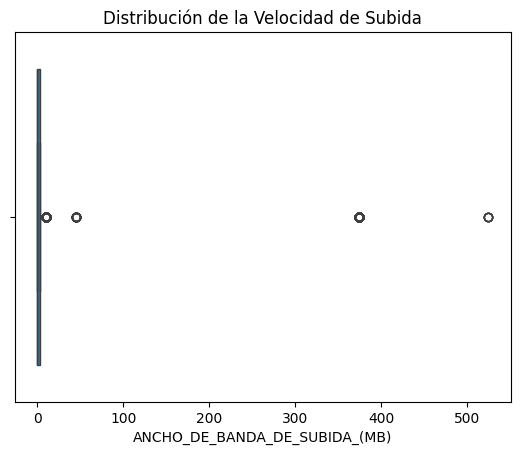

In [ ]:
# Diagrama de cajas
sns.boxplot(x='ANCHO_DE_BANDA_DE_SUBIDA_(MB)', data=df)
plt.title("Distribución de la Velocidad de Subida")
plt.show()


La mayoría de las instituciones tienen velocidades bajas y están en zonas rurales, lo cual limita la calidad del servicio. Las velocidades de subida son bajas para la mayoría de las instituciones, con algunos casos aislados que alcanzan velocidades mucho mayores, esto es consistente con una brecha tecnológica entre zonas rurales y urbanas y en lo que corresponde a la financiación de proyectos entre instituciones, para contratar el servicio.


 Matriz de correlación:
                               ANCHO_DE_BANDA_DE_SUBIDA_(MB)  \
ANCHO_DE_BANDA_DE_SUBIDA_(MB)                       1.000000   
ANCHO_DE_BANDA_DESCARGA_(MB)                        0.285906   
LATITUD                                            -0.009525   
LONGITUD                                            0.010880   

                               ANCHO_DE_BANDA_DESCARGA_(MB)   LATITUD  \
ANCHO_DE_BANDA_DE_SUBIDA_(MB)                      0.285906 -0.009525   
ANCHO_DE_BANDA_DESCARGA_(MB)                       1.000000  0.036152   
LATITUD                                            0.036152  1.000000   
LONGITUD                                          -0.038895 -0.999012   

                               LONGITUD  
ANCHO_DE_BANDA_DE_SUBIDA_(MB)  0.010880  
ANCHO_DE_BANDA_DESCARGA_(MB)  -0.038895  
LATITUD                       -0.999012  
LONGITUD                       1.000000  


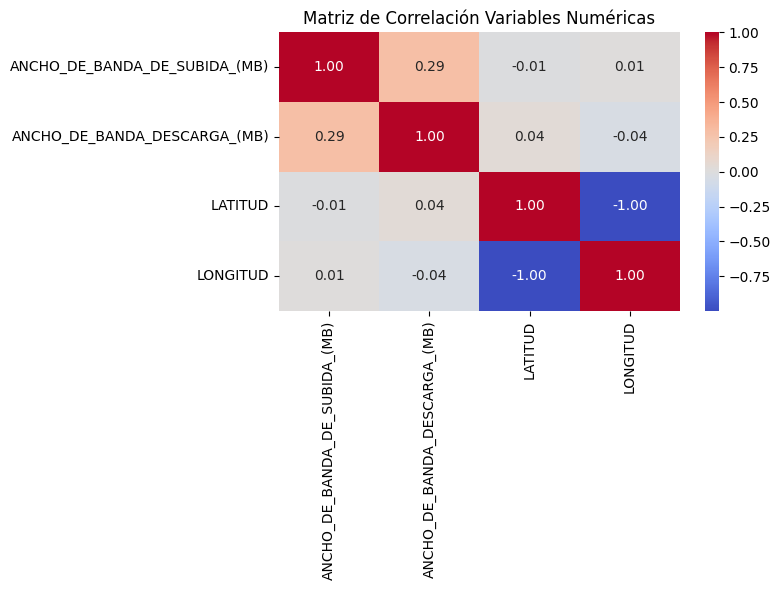

In [ ]:
# Matriz de correlación de variables numéricas
corr_vars = [
    'ANCHO_DE_BANDA_DE_SUBIDA_(MB)',
    'ANCHO_DE_BANDA_DESCARGA_(MB)',
    'LATITUD',
    'LONGITUD'
]

# variables validas
corr_vars_validas = [col for col in corr_vars if col in df.columns]

corr_matrix = df[corr_vars_validas].corr()

print("\n Matriz de correlación:")
print(corr_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación Variables Numéricas")
plt.tight_layout()
plt.show()

El análisis del resultado de la matriz de correlación de las variables númericas, muestra que las instituciones con mayor velocidad de subida también tienden a tener mayor velocidad de descarga, lo que puede confirmar que ambas dimensiones responden a la calidad de la infraestructura. Por otro lado, no se identificó una relación clara entre las velocidades de conexión y las coordenadas geográficas. Sería viable cruzar la información con la variable categorica zona, para establecer o visualizar las posibles desigualdades entre el sector rural y el urbano.

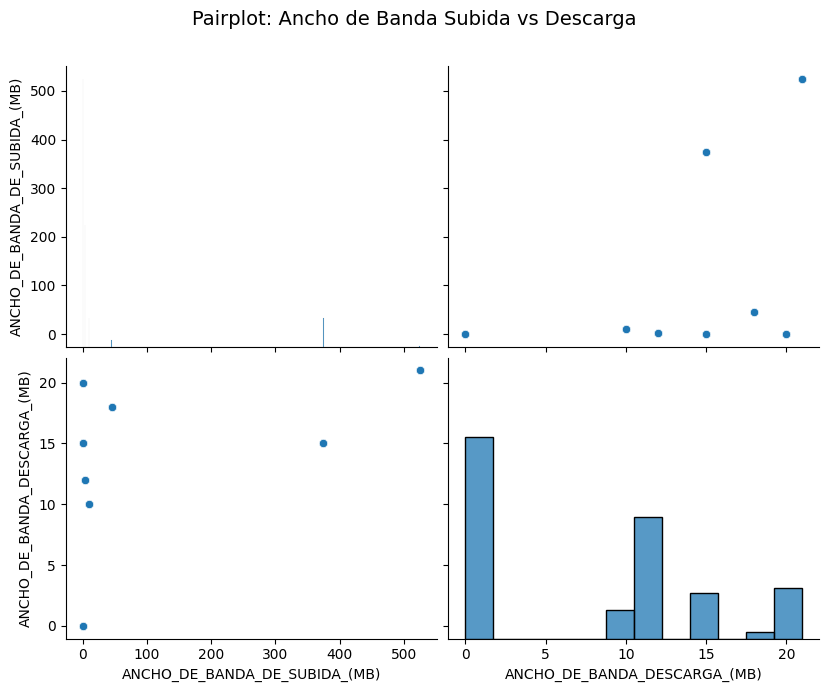

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_numericas = [
    'ANCHO_DE_BANDA_DE_SUBIDA_(MB)',
    'ANCHO_DE_BANDA_DESCARGA_(MB)'
]

# pairplot
g = sns.pairplot(df[variables_numericas], height=3.5, aspect=1.2)

# Ajustar espacio
plt.subplots_adjust(top=0.9)
plt.suptitle("Pairplot: Ancho de Banda Subida vs Descarga", fontsize=14)
plt.show()

Los resultados muestran una relación positiva entre subida y descarga, con concentración en valores bajos fenómeno consistente con lo observado hasta el momento en el comportamiento de los datos estudiados.

# Categorización Variable Continua y Comparativo de Distribuciones

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# The dataframe 'df' is already loaded and cleaned in the previous cells,
# so there is no need to load it again from a local file.


# Categorizar la variable continua: ANCHO DE BANDA DE SUBIDA (MB)
def categorizar_subida(x):
    if pd.isna(x):
        return 'Sin dato'
    elif x <= 5:
        return 'Bajo'
    elif x <= 50:
        return 'Medio'
    else:
        return 'Alto'

df['CATEGORIA_SUBIDA'] = df['ANCHO_DE_BANDA_DE_SUBIDA_(MB)'].apply(categorizar_subida)

# Estandarizar y escalar dos variables numéricas
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

df[['SUBIDA_STD', 'DESCARGA_STD']] = scaler_std.fit_transform(
    df[['ANCHO_DE_BANDA_DE_SUBIDA_(MB)', 'ANCHO_DE_BANDA_DESCARGA_(MB)']]
)

df[['SUBIDA_MINMAX', 'DESCARGA_MINMAX']] = scaler_minmax.fit_transform(
    df[['ANCHO_DE_BANDA_DE_SUBIDA_(MB)', 'ANCHO_DE_BANDA_DESCARGA_(MB)']]
)

print(df[['ANCHO_DE_BANDA_DE_SUBIDA_(MB)', 'ANCHO_DE_BANDA_DESCARGA_(MB)',
          'CATEGORIA_SUBIDA', 'SUBIDA_STD', 'DESCARGA_STD',
          'SUBIDA_MINMAX', 'DESCARGA_MINMAX']].head())

   ANCHO_DE_BANDA_DE_SUBIDA_(MB)  ANCHO_DE_BANDA_DESCARGA_(MB)  \
0                            3.0                          12.0   
1                            3.0                          12.0   
2                          375.0                          15.0   
3                            3.0                          12.0   
4                            3.0                          12.0   

  CATEGORIA_SUBIDA  SUBIDA_STD  DESCARGA_STD  SUBIDA_MINMAX  DESCARGA_MINMAX  
0             Bajo   -0.258927      0.558687       0.005714         0.571429  
1             Bajo   -0.258927      0.558687       0.005714         0.571429  
2             Alto    3.651437      0.961737       0.714286         0.714286  
3             Bajo   -0.258927      0.558687       0.005714         0.571429  
4             Bajo   -0.258927      0.558687       0.005714         0.571429  


SUBIDA_CATEGORIA
0-2      1131
2-5       514
5-10      122
20-50      29
10-20       0
Name: count, dtype: int64


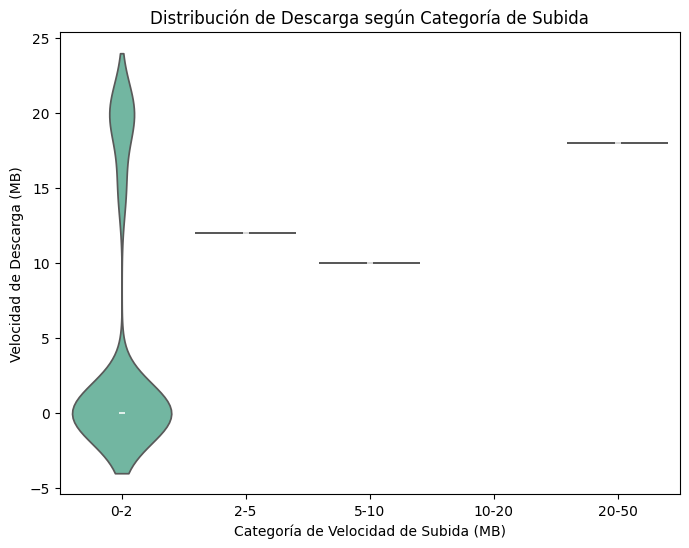

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# velocidad de subida en rangos
df['SUBIDA_CATEGORIA'] = pd.cut(
    df['ANCHO_DE_BANDA_DE_SUBIDA_(MB)'],
    bins=[0, 2, 5, 10, 20, 50],
    labels=['0-2', '2-5', '5-10', '10-20', '20-50'],
    include_lowest=True
)


print(df['SUBIDA_CATEGORIA'].value_counts())

# Diagrama de violín
plt.figure(figsize=(8,6))
sns.violinplot(
    x='SUBIDA_CATEGORIA',
    y='ANCHO_DE_BANDA_DESCARGA_(MB)',
    hue='SUBIDA_CATEGORIA',
    data=df,
    palette='Set2',
    dodge=False,
    legend=False
)
plt.title("Distribución de Descarga según Categoría de Subida")
plt.xlabel("Categoría de Velocidad de Subida (MB)")
plt.ylabel("Velocidad de Descarga (MB)")
plt.show()


Se observa que existe una correlación positiva entre las velocidades de subida y descarga: a medida que aumenta la capacidad de subida contratada o instalada, la descarga también mejora. Sin embargo, la heterogeneidad dentro de los rangos sugiere que no todas las instituciones aprovechan plenamente la infraestructura disponible o que hay factores adicionales que afectan el desempeño real.

   SUBIDA_STD  DESCARGA_STD
0   -0.258860      0.558541
1   -0.258860      0.558541
2    3.650489      0.961487
3   -0.258860      0.558541
4   -0.258860      0.558541


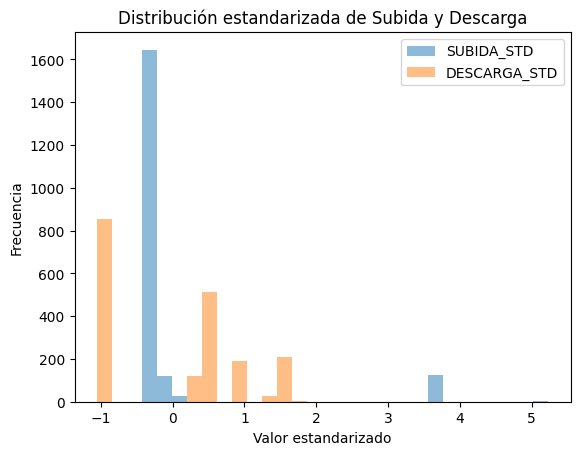

In [ ]:
# Comparación de histogramas

import matplotlib.pyplot as plt

# Estandarizar variables
df['SUBIDA_STD'] = (
    df['ANCHO_DE_BANDA_DE_SUBIDA_(MB)'] - df['ANCHO_DE_BANDA_DE_SUBIDA_(MB)'].mean()
) / df['ANCHO_DE_BANDA_DE_SUBIDA_(MB)'].std()

df['DESCARGA_STD'] = (
    df['ANCHO_DE_BANDA_DESCARGA_(MB)'] - df['ANCHO_DE_BANDA_DESCARGA_(MB)'].mean()
) / df['ANCHO_DE_BANDA_DESCARGA_(MB)'].std()

# Verificar
print(df[['SUBIDA_STD', 'DESCARGA_STD']].head())

# Visualización de la gráfica
df[['SUBIDA_STD', 'DESCARGA_STD']].plot(kind='hist', alpha=0.5, bins=30)
plt.title("Distribución estandarizada de Subida y Descarga")
plt.xlabel("Valor estandarizado")
plt.ylabel("Frecuencia")
plt.show()


Se evidencia que las velocidades de conexión tanto de subida como de descarga no están distribuidas de forma uniforme ni normal, existe una clara desigualdad, con pocas instituciones muy bien conectadas y la mayoría rezagadas respecto a la media. Esto refuerza la necesidad de políticas para reducir la brecha digital, especialmente para instituciones que se encuentran muy por debajo del promedio.

# Mapa de Georreferenciación

In [ ]:

print(df['LATITUD'].unique())
print(df['LONGITUD'].unique())

[4.94506202e-04 5.36944400e-06 5.49877760e-03 ... 5.28333300e-06
 5.29948594e-03 5.90317600e-06]
[-7.33808487e-03 -7.28813890e-05 -7.29126497e-03 ... -7.31566670e-05
 -7.31561816e-04 -7.35616790e-05]


In [ ]:
df[['LATITUD', 'LONGITUD']].head(10)

LATITUD  LONGITUD
0  0.000495 -0.007338
1  0.000005 -0.000073
2  0.005499 -0.007291
3  0.000005 -0.000073
4  0.000006 -0.000073
5  0.000006 -0.000073
6  0.005586 -0.007289
7  0.005503 -0.007291
8  0.000005 -0.000073
9  0.000005 -0.000073

In [ ]:
import pandas as pd
import folium

# The dataframe 'df' is already loaded and cleaned in the previous cells,
# so there is no need to load it again from a local file.

# Normalizar coordenadas
df['LATITUD'] = df['LATITUD'] / 1_000_000
df['LONGITUD'] = df['LONGITUD'] / 1_000_000

# Filtrar datos válidos
df_geo = df.dropna(subset=['LATITUD', 'LONGITUD'])
df_geo = df_geo[(df_geo['LATITUD'] > 0) & (df_geo['LONGITUD'] < 0)]

print(f" Instituciones con coordenadas válidas: {df_geo.shape[0]}")
print(df_geo[['LATITUD', 'LONGITUD']].head())

#  Crear mapa centrado en Boyacá
m = folium.Map(location=[5.4545, -73.362], zoom_start=7)

# Añadir puntos
for idx, row in df_geo.iterrows():
    folium.CircleMarker(
        location=[row['LATITUD'], row['LONGITUD']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=row['NOMBRE_INSTITUCION_EDUCATIVA']
    ).add_to(m)

# visualizar mapa georreferenciación
m

 Instituciones con coordenadas válidas: 1925
        LATITUD      LONGITUD
0  4.945062e-10 -7.338085e-09
1  5.369444e-12 -7.288139e-11
2  5.498778e-09 -7.291265e-09
3  5.304167e-12 -7.292778e-11
4  5.508333e-12 -7.286917e-11


El mapa de georreferenciación, permite ubicar en el mapa del departamento de Boyacá, la ubicación precisa en cuanto a latitud y longitud de las instituciones educativas oficiales las cuales son objeto de la ejecución opuesta en marcha d elos proyectos de conectividad, para disminuir la brecha tecnológica en el sector educativo frente a otros departamentos del país, de acuerdo a sus políticas y las metas propuestas del plan de desarrollo del presente cuatrenio.

# <center>Discusión de hallazgos</center>

* Los resultados del análisis exploratorio de datos permiten visibilizar las desigualdades estructurales en el acceso a la conectividad de las instituciones educativas del departamento de Boyacá y a pesar de los esfuerzos por mejorar las condiciones tecnológicas, persisten diferencias significativas según la ubicación y posiblemente según la capacidad económica o priorización de las instituciones.  

* La correlación entre las velocidades de subida y descarga, es una buena señal de consistencia en la infraestructura donde está disponible, pero la falta de correlación con las coordenadas sugiere que factores socioeconómicos y de planeación regional, son más determinantes que la geografía en sí misma.  

* Los gráficos utilizados en el análisis permitieron visualizar claramente las desigualdades y evidenciar dónde es más necesario intervenir. Las instituciones rurales, en particular, muestran rezagos considerables, lo que plantea un desafío para las políticas públicas orientadas a cerrar la brecha digital.  

# <center> Conclusiones </center>

* La base de datos inicial presentaba inconsistencias como valores nulos, textos no estandarizados, coordenadas inválidas y duplicados.  

* Tras la limpieza, se obtuvo un conjunto de datos más confiable, eliminando registros erróneos y estandarizando las variables.

* La mayoría de las instituciones presentan velocidades de subida y descarga significativamente por debajo de la media, lo que evidencia una importante desigualdad en el acceso a infraestructura tecnológica y solo unas pocas instituciones cuentan con velocidades superiores a la media.

* Se observó una fuerte correlación positiva entre la velocidad de subida y la velocidad de descarga, lo cual es consistente con la naturaleza complementaria de ambas métricas. Sin embargo, no se evidenció una relación clara entre las coordenadas geográficas latitud y longitud con reloación a las velocidades, lo que sugiere que otros factores como la zona urbana/rural o la disponibilidad de proveedores afectan más el servicio.

* El análisis por zona mostró una clara brecha digital: las instituciones en zonas urbanas tienden a tener mejores velocidades de conexión que las rurales.

# <center> Referencias </center>

Alex Galea. (2018)._Applied Data Science with Python and Jupyter: Use Powerful Industry-standard Tools to Unlock New, Actionable Insights From Your Data: Vol. 1st edition_. Packt Publishing. (pp. 29-49). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1925348&lang=es&site=ehost-live&ebv=EB&ppid=pp_29

Boschetti, A., & Massaron, L. (2016)._Python Data Science Essentials - Second Edition (Vol. 0002)_. Packt Publishing. (pp. 124-134). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1409191&lang=es&site=ehost-live&ebv=EB&ppid=pp_124

Samir Madhavan. (2015). _Mastering Python for Data Science: Explore the World of Data Science Through Python and Learn How to Make Sense of Data_. Packt Publishing. (pp. 77-106). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1058787&lang=es&site=ehost-live&ebv=EB&ppid=pp_77

Thakur, A. (2016). _Python: Real-World Data Science_. Packt Publishing. (pp. 536 - 563). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1250754&lang=es&site=ehost-live&ebv=EB&ppid=pp_539

In [ ]:
df.to_excel("instituciones_boyaca_limpio.xlsx", index=True)
print("\n Archivo limpio guardado como: instituciones_boyaca_limpio.xlsx")


 Archivo limpio guardado como: instituciones_boyaca_limpio.xlsx


In [ ]:
import pandas as pd
import folium

# Se realiza la conexion de base de datos  desde  link de ubicacion de XLSX
url='https://drive.usercontent.google.com/download?id=1OM_7AZZajQwzqm97tFaFepxCLNiVgTfx&export=download&authuser=0&confirm=t&uuid=432970cb-82fc-4389-a17e-24d1efea1617&at=AN8xHop1nByqqwBRK7yvOqC-dj9A:1755043842291'

df=pd.read_excel(url)

# Se renombrarn las columnas para quitar tildes, espacios y caracteres especiales
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("Á", "A")
    .str.replace("É", "E")
    .str.replace("Í", "I")
    .str.replace("Ó", "O")
    .str.replace("Ú", "U")
    .str.replace("Ñ", "N")
    .str.replace("Ã“", "O")
    .str.replace("Ã‰", "E") # Added to handle the character observed in 'DEPARTAMENTO'
    .str.replace("Ã", "A") # Added to handle other potential similar characters
)

# Se eliminan las filas duplicadas
df = df.drop_duplicates()

# Se rellenan valores nulos o que aparezcan "sin dato"
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna("Sin dato")

# En el caso que sean campos númericos se rellena con 0 sí figuran nulos o vacíos
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(0)

# Corregir coordenadas LATITUD y LONGITUD
df = df[(df['LATITUD'] > 0) & (df['LONGITUD'] < 0)]

# Reemplazar todos los valores en la columna 'DEPARTAMENTO' por 'BOYACA'
df['DEPARTAMENTO'] = 'BOYACA'

# Normalizar coordenadas
df['LATITUD'] = df['LATITUD'] / 1_000_000
df['LONGITUD'] = df['LONGITUD'] / 1_000_000

# Filtrar datos válidos
df_geo = df.dropna(subset=['LATITUD', 'LONGITUD'])
df_geo = df_geo[(df_geo['LATITUD'] > 0) & (df_geo['LONGITUD'] < 0)]

print(f" Instituciones con coordenadas válidas: {df_geo.shape[0]}")
print(df_geo[['LATITUD', 'LONGITUD']].head())

#  Crear mapa centrado en Boyacá
m = folium.Map(location=[5.4545, -73.362], zoom_start=7)

# Añadir puntos
for idx, row in df_geo.iterrows():
    folium.CircleMarker(
        location=[row['LATITUD'], row['LONGITUD']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=row['NOMBRE_INSTITUCION_EDUCATIVA']
    ).add_to(m)

# visualizar mapa georreferenciación
m

 Instituciones con coordenadas válidas: 1925
       LATITUD     LONGITUD
0   494.506202 -7338.084868
1     5.369444   -72.881389
2  5498.777603 -7291.264973
3     5.304167   -72.927778
4     5.508333   -72.869167
